<a href="https://colab.research.google.com/github/lponcec94/PolyWorks/blob/main/semana_3/Ejemplo_London_Bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objetivo 

1. Realizar estandarización a los datos de dos maneras:
  
  * z-score
  * mínimo y máximo

2. Implementar PCA. 
3. Utilizar el método del codo para seleccionar el número óptimo de clusters.
4. Utilizar el modelo de KMeans

### Introducción 

In [62]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_3/data/london-bicycles.csv')

#### EDA

In [3]:
df.head()

,station_name,duration,num_trips,distance_from_city_center
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240
1,"Webber Street , Southwark",823.879056,8136,0.164021
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903
4,"Harper Road, Borough",822.686747,1660,0.306306


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   station_name               794 non-null    object 
 1   duration                   794 non-null    float64
 2   num_trips                  794 non-null    int64  
 3   distance_from_city_center  794 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 24.9+ KB


In [5]:
df['station_name'].unique().shape

(794,)

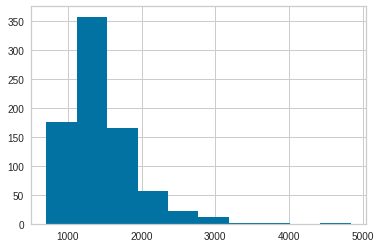

In [6]:
df['duration'].hist()

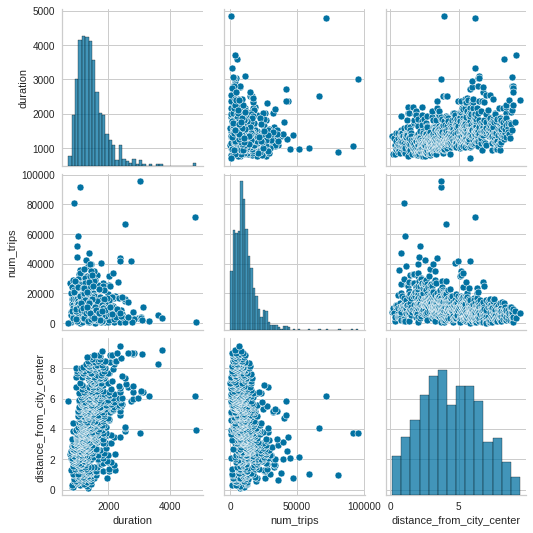

In [7]:
sns.pairplot(df)

#### 1. Estandarizando los datos

> $z = (x - u) / s$

In [8]:
scaler = StandardScaler()
df_standar_scaler = scaler.fit_transform(df._get_numeric_data())

> X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

> X_scaled = X_std * (max - min) + min

In [9]:
scaler = MinMaxScaler()
df_minmax_scaler = scaler.fit_transform(df._get_numeric_data())

#### 2. Implementando PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(df_standar_scaler)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
standard_pca = pca.transform(df_standar_scaler)
standard_pca.shape

(794, 2)

In [20]:
df_standard_pca = pd.DataFrame(standard_pca, 
                               columns=['C1', 'C2'])
df_standard_pca.head()

,C1,C2
0,1.299881,-0.546676
1,1.955028,-1.181406
2,2.027983,-0.967819
3,1.299222,-0.648669
4,1.609642,-1.704574


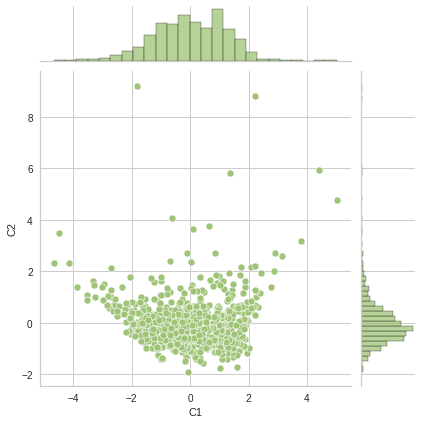

In [24]:
sns.jointplot(data=df_standard_pca, x='C1', y='C2', color='g')



---



---



In [30]:
pca = PCA(n_components=2)
pca.fit(df_minmax_scaler)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
minmax_pca = pca.transform(df_minmax_scaler)
minmax_pca.shape

(794, 2)

In [32]:
df_minmax_pca = pd.DataFrame(minmax_pca, 
                               columns=['C1', 'C2'])
df_minmax_pca.head()

,C1,C2
0,-0.439657,-0.002132
1,-0.466971,-0.100007
2,-0.466624,-0.081987
3,-0.428376,-0.016261
4,-0.441633,-0.142097


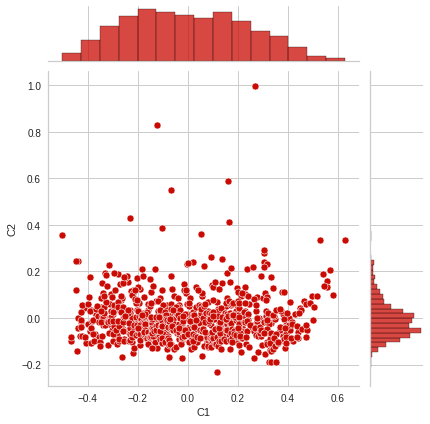

In [34]:
sns.jointplot(data=df_minmax_pca, x='C1', y='C2', color='r')

#### 3. Método del Codo

In [64]:
K = range(2, 10)

distortions = []
silhouette_coef = []

for k in K:
  model = KMeans(n_clusters=k).fit(df_standard_pca)
  distortions.append(model.inertia_)
  score = silhouette_score(df_standard_pca, model.labels_)
  silhouette_coef.append(score)


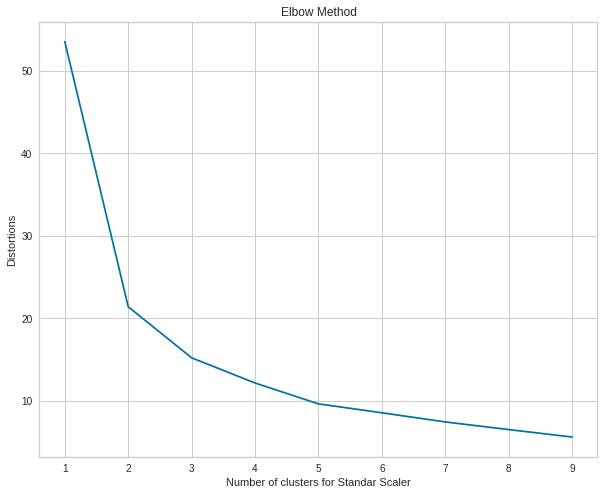

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(K, distortions, 'x-')
plt.xlabel('Number of clusters for Standar Scaler')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

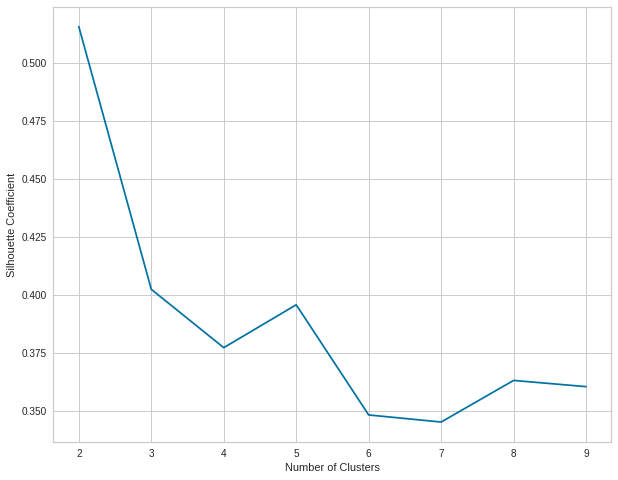

In [66]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), silhouette_coef)
plt.xticks(range(2, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e2d5c67d0>,
                 k=None, metric=None, model=None, timings=True)

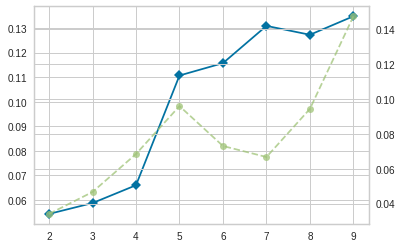

In [67]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(df_standard_pca)
# visualizer.show()

--- 

In [70]:
K = range(2, 10)

distortions = []
silhouette_coef = []

for k in K:
  model = KMeans(n_clusters=k).fit(df_minmax_pca)
  distortions.append(model.inertia_)
  score = silhouette_score(df_minmax_pca, model.labels_)
  silhouette_coef.append(score)


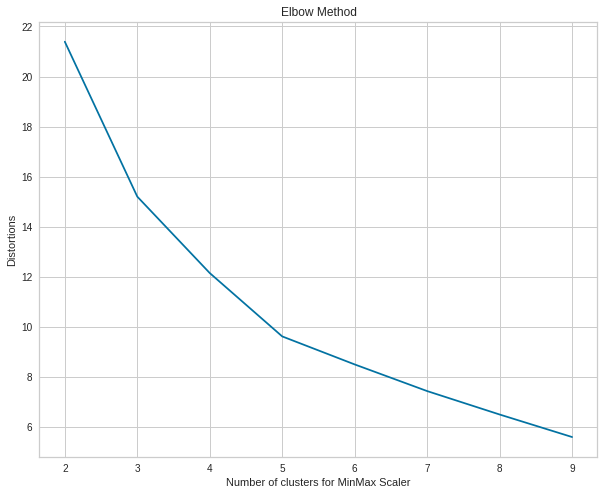

In [71]:
plt.figure(figsize=(10, 8))
plt.plot(K, distortions, 'x-')
plt.xlabel('Number of clusters for MinMax Scaler')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

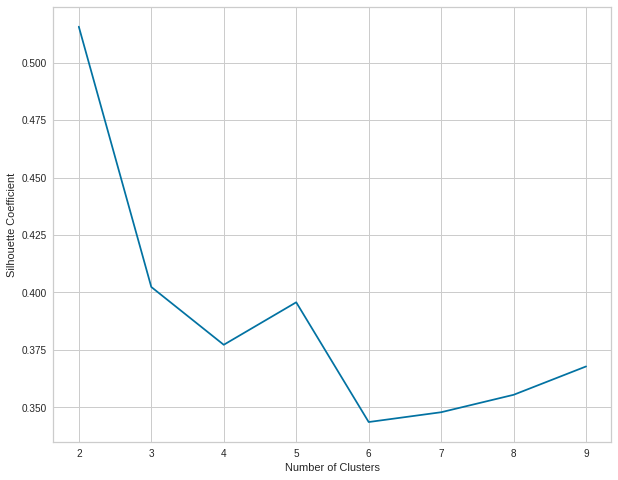

In [72]:
plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), silhouette_coef)
plt.xticks(range(2, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e2d2a4110>,
                 k=None, metric=None, model=None, timings=True)

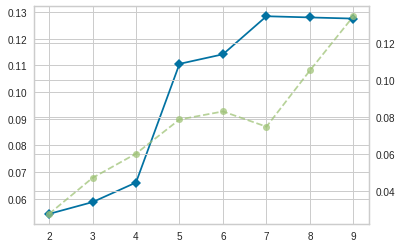

In [73]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(df_minmax_pca)
# visualizer.show()

#### 4. KMeans 

In [42]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_standard_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [43]:
model.cluster_centers_

array([[ 0.28848926,  0.00771012],
       [ 0.00111112, -0.01604478],
       [-0.26440646,  0.01090993]])

In [44]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
predict_labels = model.predict(df_standard_pca)

In [48]:
df['cluster_standard'] = predict_labels

In [49]:
df.head(10)

,station_name,duration,num_trips,distance_from_city_center,cluster_standard
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240,2
1,"Webber Street , Southwark",823.879056,8136,0.164021,2
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667,2
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903,2
4,"Harper Road, Borough",822.686747,1660,0.306306,2
5,"Harper Road, The Borough",1083.973129,4168,0.306306,2
6,"Borough High Street, The Borough",1222.199838,11119,0.386823,2
7,"Ontario Street, Elephant & Castle",1446.940998,12491,0.398630,2
8,"Union Street, The Borough",994.570945,12411,0.423106,2
9,"Swan Street, The Borough",1024.264873,12338,0.502051,2


--- 

In [50]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_minmax_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [51]:
model.cluster_centers_

array([[ 0.28848926,  0.00771012],
       [ 0.00111112, -0.01604478],
       [-0.26440646,  0.01090993]])

In [52]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
predict_labels = model.predict(df_minmax_pca)

In [54]:
df['cluster_minmax'] = predict_labels

In [55]:
df.head(10)

,station_name,duration,num_trips,distance_from_city_center,cluster_standard,cluster_minmax
0,"Borough Road, Elephant & Castle",1349.318091,7523,0.126240,2,2
1,"Webber Street , Southwark",823.879056,8136,0.164021,2,2
2,"Great Suffolk Street, The Borough",844.355487,10442,0.193667,2,2
3,"LSBU (Borough Road), Elephant & Castle",1297.835314,7068,0.257903,2,2
4,"Harper Road, Borough",822.686747,1660,0.306306,2,2
5,"Harper Road, The Borough",1083.973129,4168,0.306306,2,2
6,"Borough High Street, The Borough",1222.199838,11119,0.386823,2,2
7,"Ontario Street, Elephant & Castle",1446.940998,12491,0.398630,2,2
8,"Union Street, The Borough",994.570945,12411,0.423106,2,2
9,"Swan Street, The Borough",1024.264873,12338,0.502051,2,2


--- 

In [60]:
import plotly.express as px
fig = px.scatter_3d(df, x='duration', y='num_trips', z='distance_from_city_center',
              color='cluster_standard', opacity=0.5)
fig.show()

In [61]:
import plotly.express as px
fig = px.scatter_3d(df, x='duration', y='num_trips', z='distance_from_city_center',
              color='cluster_standard', symbol='cluster_minmax' , opacity=0.5)
fig.show()